Shivani Verma (40821105)

# LAB 7

# PCA with KMeans Algorithm

Using Persons Interests Dataset

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
# import libraries and iris dataset
data = pd.read_csv(r"C:\Users\HP\Downloads\kaggle_Interests_group.csv\kaggle_Interests_group.csv")
data

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,I,53,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN
6336,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6337,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6338,I,38,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN


Data Preprocessing

In [27]:
#check null value in the dataset
data.isnull().sum()

group                     0
grand_tot_interests       0
interest1              5347
interest2              6339
interest3              6305
                       ... 
interest213            6338
interest214            6268
interest215            1397
interest216            2282
interest217            6193
Length: 219, dtype: int64

In [28]:
data_ = data. replace(np. nan,0)
data_

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C,43,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,C,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,C,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,C,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,I,53,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6336,I,48,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6337,I,48,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6338,I,38,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [29]:
#check null
data_.isnull().sum()

group                  0
grand_tot_interests    0
interest1              0
interest2              0
interest3              0
                      ..
interest213            0
interest214            0
interest215            0
interest216            0
interest217            0
Length: 219, dtype: int64

In [30]:
#data preprocessing
#covert string coloumns into integers
from sklearn.preprocessing import LabelEncoder
for column in data_.columns:
    if data_[column].dtype==np.number:
        continue
    else:
        data_[column]=LabelEncoder().fit_transform(data_[column])

C:\Users\HP\AppData\Local\Temp/ipykernel_7960/3618405990.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data_[column].dtype==np.number:


Standardization

In [31]:
# Step 1:
#STANDARDIZATION
X_stand = StandardScaler().fit_transform(data_)
X_stand = pd.DataFrame(X_stand)
X_stand.columns = data_.columns
X_stand

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,-1.273251,-1.293609,-0.430943,-0.01256,-0.074506,-0.062919,-0.379191,-1.072667,-0.01256,-0.122013,...,-0.137137,-0.132878,-1.963299,-0.799433,-0.400142,-0.017764,-0.107177,-1.880174,-1.333060,-0.154066
1,-1.273251,0.363076,2.320494,-0.01256,-0.074506,-0.062919,2.629660,-1.072667,-0.01256,-0.122013,...,-0.137137,-0.132878,0.506407,-0.799433,-0.400142,-0.017764,-0.107177,0.530890,0.749128,-0.154066
2,-1.273251,-0.656422,-0.430943,-0.01256,-0.074506,-0.062919,-0.379191,-1.072667,-0.01256,-0.122013,...,-0.137137,-0.132878,0.506407,-0.799433,-0.400142,-0.017764,-0.107177,0.530890,0.749128,-0.154066
3,-1.273251,-0.210392,-0.430943,-0.01256,-0.074506,-0.062919,-0.379191,-1.072667,-0.01256,-0.122013,...,-0.137137,-0.132878,-1.963299,1.247580,-0.400142,-0.017764,-0.107177,0.530890,0.749128,-0.154066
4,-1.273251,-0.082955,-0.430943,-0.01256,-0.074506,-0.062919,2.629660,-1.072667,-0.01256,-0.122013,...,-0.137137,-0.132878,0.506407,-0.799433,-0.400142,-0.017764,-0.107177,0.530890,0.749128,-0.154066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,-0.323108,1.000262,-0.430943,-0.01256,-0.074506,-0.062919,-0.379191,0.929897,-0.01256,-0.122013,...,-0.137137,-0.132878,0.506407,1.247580,-0.400142,-0.017764,-0.107177,0.530890,0.749128,-0.154066
6336,-0.323108,0.681669,-0.430943,-0.01256,-0.074506,-0.062919,-0.379191,0.929897,-0.01256,-0.122013,...,-0.137137,-0.132878,0.506407,-0.799433,-0.400142,-0.017764,-0.107177,0.530890,0.749128,-0.154066
6337,-0.323108,0.681669,-0.430943,-0.01256,-0.074506,-0.062919,-0.379191,0.929897,-0.01256,-0.122013,...,-0.137137,-0.132878,0.506407,-0.799433,-0.400142,-0.017764,-0.107177,0.530890,0.749128,-0.154066
6338,-0.323108,0.044482,-0.430943,-0.01256,-0.074506,-0.062919,-0.379191,0.929897,-0.01256,-0.122013,...,-0.137137,-0.132878,0.506407,1.247580,2.485979,-0.017764,-0.107177,0.530890,0.749128,-0.154066


PCA

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(data_)
print(pca.explained_variance_ratio_)

[9.49235758e-01 6.19439464e-03 4.36044332e-03 1.88282603e-03
 1.55498828e-03 1.37022202e-03 1.14955455e-03 1.06412102e-03
 1.03224520e-03 9.45753689e-04 8.03173975e-04 7.70378970e-04
 7.05469360e-04 7.02585193e-04 6.61827258e-04 6.35684134e-04
 6.27586193e-04 6.00323598e-04 5.98143267e-04 5.83910090e-04
 5.64200782e-04 5.47424912e-04 5.34088858e-04 5.24839771e-04
 5.09674299e-04 5.00065218e-04 4.92024787e-04 4.89189621e-04
 4.73509333e-04 4.68574097e-04 4.54754513e-04 4.51547826e-04
 4.35569496e-04 4.28945061e-04 4.18927889e-04 4.00792144e-04
 3.97213755e-04 3.87087555e-04 3.82845244e-04 3.66746909e-04
 3.63311079e-04 3.57769903e-04 3.44519992e-04 3.40536288e-04
 3.32012198e-04 3.26213895e-04 3.22028515e-04 3.14949283e-04
 3.08989032e-04 3.06029736e-04 3.02259639e-04 2.98596607e-04
 2.89967440e-04 2.87853961e-04 2.75261471e-04 2.74059339e-04
 2.62147527e-04 2.55082029e-04 2.44837965e-04 2.43285782e-04
 2.37207375e-04 2.29798651e-04 2.25200291e-04 2.23536982e-04
 2.17665421e-04 2.139587

In [89]:
pca_reduced = PCA(n_components = 2)
pca_new = pca_reduced.fit_transform(X_stand)
print(pca_reduced.explained_variance_ratio_)

[0.08924033 0.03750902]


In [34]:
#Creating a Pandas DataFrame of reduced Dataset
newsk_df = pd.DataFrame(pca_new , columns = ['PC1','PC2'])
newsk_df = pd.concat([newsk_df , pd.DataFrame(target)] , axis = 1)

,PC1,PC2
0,-4.977626,0.795923
1,1.721810,-2.967246
2,-2.072400,2.114064
3,-1.139111,-0.431215
4,-0.610407,1.816071
...,...,...
6335,3.897068,2.425936
6336,3.001677,2.071524
6337,2.862340,0.666356
6338,0.998724,-2.338648


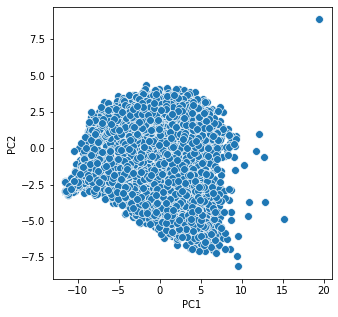

In [90]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sb.scatterplot(data = newsk_df , x = 'PC1',y = 'PC2' ,s = 60)
newsk_df

In [109]:
#data preprocessing
#covert string coloumns into integers
from sklearn.preprocessing import LabelEncoder
for column in newsk_df.columns:
    if newsk_df[column].dtype==np.number:
        continue
    else:
        newsk_df[column]=LabelEncoder().fit_transform(newsk_df[column])

C:\Users\HP\AppData\Local\Temp/ipykernel_7960/565739264.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if newsk_df[column].dtype==np.number:


In [110]:
newsk_df

,PC1,PC2
0,-4.977626,0.795923
1,1.721810,-2.967246
2,-2.072400,2.114064
3,-1.139111,-0.431215
4,-0.610407,1.816071
...,...,...
6335,3.897068,2.425936
6336,3.001677,2.071524
6337,2.862340,0.666356
6338,0.998724,-2.338648


KMeans Algorithm

In [111]:
from sklearn.cluster import KMeans
#WCSS stands for "within cluster sum of square"
WCS = []
for i in range (1, 10):
    model = KMeans(n_clusters = i, max_iter = 250, n_init = 15, random_state = 0)
    model.fit(newsk_df)
    WCS.append(model.inertia_)
print(WCS)

[175986.39883037898, 92368.66266419597, 53546.494405099394, 36783.9848496688, 27849.0921656844, 21748.108770070303, 18511.45430941547, 15711.974477973725, 13993.44573729616]


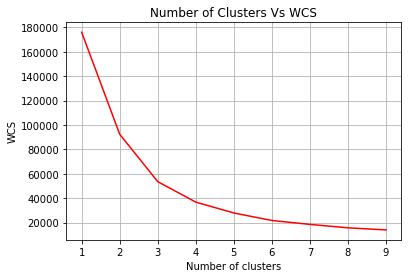

In [112]:
plt.plot(range(1,10),WCS, color = 'r')
plt.title('Number of Clusters Vs WCS')
plt.xlabel('Number of clusters')
plt.ylabel('WCS')
plt.grid()
plt.show()

In [117]:
X=newsk_df.iloc[:, [0,1]].values
X

array([[-4.97762649,  0.79592254],
       [ 1.72180984, -2.96724575],
       [-2.07239982,  2.11406362],
       ...,
       [ 2.8623399 ,  0.66635648],
       [ 0.99872368, -2.33864846],
       [ 7.49353011, -5.48484924]])

In [128]:
model = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 250, n_init = 15, random_state = 0)
y = model.fit_predict(X)
kmeans.cluster_centers_

array([[-0.04825073, -1.9451105 , -0.41074126, ..., -1.79166169,
        -1.29025437, -0.14430909],
       [ 0.10189261, -0.51031729, -0.34291054, ..., -0.34489756,
        -0.39124229, -0.07069418],
       [ 0.62703409,  1.19141764,  2.3204941 , ...,  0.53089044,
         0.74912783, -0.15406647],
       ...,
       [-0.0971082 ,  0.85362684,  0.54801251, ...,  0.52372176,
         0.59642029,  0.01715658],
       [-1.0710929 ,  0.71013868,  0.01787323, ...,  0.29149401,
         0.30610914,  0.08156373],
       [ 0.0945204 ,  0.71430503, -0.13252532, ...,  0.48459601,
         0.50708835,  0.145931  ]])

In [120]:
y

array([3, 2, 3, ..., 1, 2, 2])

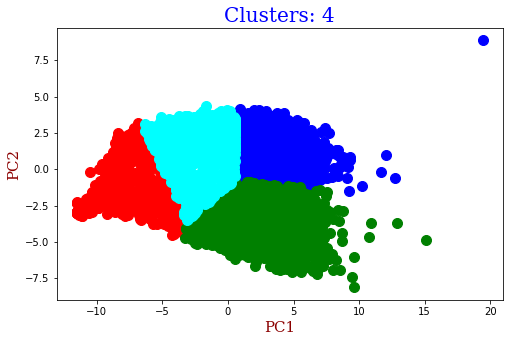

In [145]:
# Visualising the clusters
plt.figure(figsize=(8,5))
plt.scatter(X[y==0, 0], X[y==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y==3, 0], X[y==3, 1], s=100, c='cyan', label ='Cluster 4')
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title('Clusters: 4',fontdict = font1)
plt.xlabel('PC1',fontdict = font2)
plt.ylabel('PC2',fontdict = font2)
plt.show()

In [136]:
model = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 250, n_init = 15, random_state = 0)
Y = model.fit_predict(X)

In [124]:
Y

array([3, 0, 3, ..., 5, 4, 0])

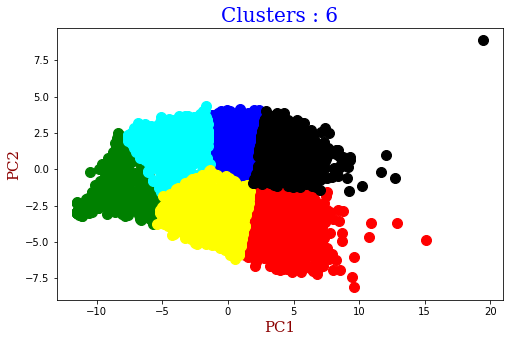

In [143]:
# Visualising the clusters
plt.figure(figsize=(5,10))
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[Y==2, 0], X[Y==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[Y==3, 0], X[Y==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[Y==4, 0], X[Y==4, 1], s=100, c='yellow', label ='Cluster 5')
plt.scatter(X[Y==5, 0], X[Y==5, 1], s=100, c='black', label ='Cluster 6')

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title('Clusters : 6',fontdict = font1)
plt.xlabel('PC1',fontdict = font2)
plt.ylabel('PC2',fontdict = font2)
plt.show()